In [1]:
import os
import json
import numpy as np
import glob
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import misc.utils2 as utils
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
split = 'val'
coco_path = './data/coco2014'
data_path = './eval_results/qualitative/tmp/'
box_path = './data/adaptive/cocobu_box/'
img_info = json.load(open(os.path.join(coco_path, 'annotations', 'captions_{}2014.json'.format(split))))
image_name = json.load(open(coco_path + '/annotations/image_name_val2014.json'))

In [193]:
img_id = 26992
set_id = 'val'
att_path = data_path+'attention_value_{}'.format(set_id)
att_b_path = data_path+'attention_b_value_{}'.format(set_id)
att_d_path = data_path+'attention_d_{}'.format(set_id)
att_d_path2 = data_path+'attention_d2_{}'.format(set_id)
with open(att_path+'/'+str(img_id)+'.pkl' , 'rb') as f:
    att_w = utils.pickle_load(f)
with open(att_b_path+'/'+str(img_id)+'.pkl' , 'rb') as f:
    att_b_w = utils.pickle_load(f)

att_d = []
for step  in range(21):
    with open(att_d_path+'/'+str(img_id)+'_s{}'.format(step)+'.pkl' , 'rb') as f:
        att_d.append(utils.pickle_load(f))

att_d2 = []
files = glob.glob(att_d_path2+'/'+str(img_id)+'*.pkl')
for step  in range(len(files)):
    with open(att_d_path2+'/'+str(img_id)+'_s{}'.format(step)+'.pkl' , 'rb') as f:
        att_d2.append(utils.pickle_load(f))
    
box = np.load(os.path.join(box_path, str(img_id)+'.npy'))

img_path = os.path.join(coco_path, 'val2014', image_name[str(img_id)])
results_path = os.path.join(data_path, set_id, image_name[str(img_id)])
img = cv2.imread(img_path)
# img=img[: , : , : : -1]
results = cv2.imread(results_path)
results=results[: , : , : : -1]

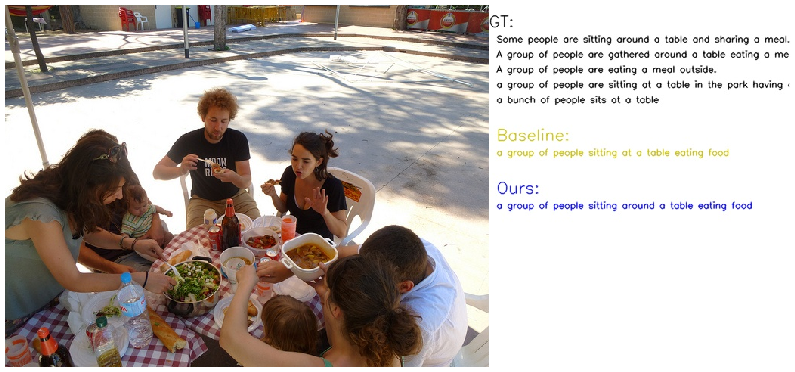

In [194]:
h,w,_= np.shape(results)
dpi = 50
figsize = w / float(dpi), h / float(dpi)

fig = plt.figure(figsize=figsize,dpi=dpi)

# plt.savefig('test.jpg',dpi=dpi*100)
# plt.imshow(results)

# plt.figure()
# plt.subplot(1,2,1)
# plt.imshow(img)
# plt.axis('off')

# plt.subplot(1,2,2)
plt.imshow(results)
plt.axis('off')
plt.show()

In [195]:
steps=[]
for i in range(len(att_d2)):
    pd2_attn1 = att_d2[i]['p_attn1']
    pd2_attn1 = np.squeeze(pd2_attn1)
    steps.append(np.argsort(pd2_attn1.sum(axis=0))[-1])
steps

[21, 21, 21, 47, 23, 49, 1, 1, 21, 23, 21]

In [196]:
steps=[]
for i in range(len(att_d2)):
    pd2_attn1 = att_d2[i]['p_attn2']
    pd2_attn1 = np.squeeze(pd2_attn1)
    steps.append(np.argsort(pd2_attn1.sum(axis=0))[-1])
steps

[14, 22, 21, 18, 21, 21, 1, 58, 21, 9, 21]

In [197]:
steps=[]
for i in range(len(att_d2)):
    pd2_attn1 = att_d2[i]['p_attn3']
    pd2_attn1 = np.squeeze(pd2_attn1)
    steps.append(np.argsort(pd2_attn1.sum(axis=0))[-1])
steps

[2, 0, 21, 57, 23, 49, 1, 0, 23, 23, 21]

In [198]:
steps=[]
for i in range(len(att_d2)):
    pd2_attn1 = att_d2[i]['p_attn1']
    pd2_attn2 = att_d2[i]['p_attn2']
    pd2_attn3 = att_d2[i]['p_attn3']
    pd2_attn = np.squeeze(pd2_attn1+pd2_attn2+pd2_attn3)
    steps.append(np.argsort(pd2_attn.sum(axis=0))[-1])
steps

[2, 52, 21, 47, 23, 49, 1, 1, 21, 23, 21]

In [199]:
if not os.path.exists('./eval_results/qualitative/tmp/fig/{}'.format(img_id)):
    os.mkdir('./eval_results/qualitative/tmp/fig/{}'.format(img_id))
for i in range(box.shape[0]):
    b = box[i]
    img = cv2.imread(img_path)
    draw_img = cv2.rectangle(img, (int(b[0]),int(b[1])), (int(b[2]),int(b[3])), (0,255,0), 2)
    cv2.imwrite('./eval_results/qualitative/tmp/fig/{}/{}.jpg'.format(img_id,i), draw_img)

In [200]:
img = cv2.imread(img_path)
cv2.imwrite('./eval_results/qualitative/tmp/fig/{}/{}.jpg'.format(img_id,img_id), img)

True

In [192]:
box_id=[13,  3, 12,  6, 16, 15]
img = cv2.imread(img_path)
cv2.imwrite('./eval_results/qualitative/tmp/fig/{}/{}.jpg'.format(img_id,img_id), img)
for i in box_id:
    b = box[i]
    img = cv2.rectangle(img, (int(b[0]),int(b[1])), (int(b[2]),int(b[3])), (0,255,0), 2)
cv2.imwrite('./eval_results/qualitative/tmp/fig/{}/{}.jpg'.format(img_id,img_id), img)

True

In [20]:
p_attn1, p_attn2, p_attn3 = att_w['p_attn1'], att_w['p_attn2'], att_w['p_attn3'],
pb_attn = att_b_w

In [29]:
p_attn1.shape

(8, 57, 57)

In [15]:
# as p
for i in range(8):
    t=np.argsort(p_attn1[i,15,:])
    print(t[-6:][::-1])

[12 15 13 16 10 22]
[16 15 10 12 22 13]
[12  0  8  2 11 18]
[12  0 15 16 13 10]
[12  3  9 17  4 15]
[ 0  2  1 18 14  7]
[16 15 10 22 13  5]
[13 22 15 16  6 12]


In [16]:
np.argsort(p_attn1[:,2,:].sum(axis=0))[-6:][::-1]

array([ 2,  0, 12,  1, 18, 13])

In [33]:
# as n
for i in range(8):
    t=np.argsort(p_attn2[i,2,:])
    print(t[-6:][::-1])

[24 16 19 10 11 22]
[24 19 11 16 10  9]
[16 24 22 19 23 15]
[24 16  9 19 10 11]
[24 10 16 19 25  9]
[24 16 22 10 19 11]
[24  9 16 19  4 11]
[10  9 24 16  4 22]


In [30]:
np.argsort(p_attn2[:,2,:].sum(axis=0))[-6:][::-1]

array([24, 16, 10,  9,  4, 22])

In [32]:
# as c
# maybe n
for i in range(8):
    t=np.argsort(p_attn3[i,2,:])
    print(t[-6:][::-1])

[24 19 16 10  8 22]
[ 9 24 11 16 19 10]
[19 11 24  1 16 10]
[11  1 19 14 16 17]
[24 16 10 19 22 23]
[24 19 11 16 10 22]
[24 16 19 22 11  8]
[24 16 19 11 10 22]


In [31]:
np.argsort(p_attn3[:,2,:].sum(axis=0))[-6:][::-1]

array([24, 19,  9, 11, 16,  1])

In [44]:
for i in range(8):
    t=np.argsort(pb_attn[i,15,:])
    print(t[-6:][::-1])

[19 18  3 12  1 13]
[ 2  1 10  7  3  9]
[ 3  6  4 18  0 14]
[ 1  2 10  7  3 13]
[ 2  1 13 10 18  3]
[ 7  1  6 18  2  4]
[0 6 1 7 4 2]
[11  2  1  5 13  7]


In [43]:
np.argsort(pb_attn[:,15,:].sum(axis=0))[-6:][::-1]

array([ 2,  1,  7, 19,  0, 11])

In [65]:
for i,id in zip(range(61),np.argmax(p_attn1[3],axis=1)):
    print(i,id)

0 21
1 21
2 21
3 21
4 21
5 21
6 11
7 11
8 45
9 21
10 21
11 21
12 21
13 21
14 11
15 21
16 21
17 45
18 21
19 21
20 21
21 21
22 21
23 21
24 11
25 30
26 21
27 11
28 45
29 21
30 11
31 11
32 35
33 21
34 0
35 11
36 11
37 26
38 11
39 11
40 28
41 21
42 22
43 27
44 19
45 11
46 11
47 11
48 37
49 37
50 37
51 37
52 37
53 37
54 37
55 37
56 37
57 37
58 37
59 37
60 37


In [33]:
x=np.array([[1,2,3],[3,4,5]])

In [35]:
x.sum(axis=1)

array([ 6, 12])

In [5]:
p = pred_results[1]
img_id = p['image_id']
result = p['caption']
gt = captions_gt[str(img_id)]
img_path = os.path.join(coco_path, 'val2014', image_name[str(img_id)])
# img = Image.open(img_path)
img = mpimg.imread(img_path)


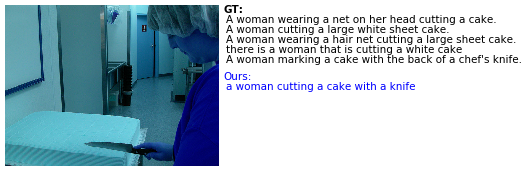

In [25]:
h,w,_= np.shape(img)
img_plate=np.zeros((h,w+100,3),dtype=np.uint8)+255
img_plate[0:h,0:w,:]=img

dpi = 50
figsize = 0.5*w / float(dpi), 0.5*h / float(dpi)

fig = plt.figure(figsize=figsize,dpi=dpi)
# ax = fig.add_axes([0, 0, 1, 1])
# Hide spines, ticks, etc.)
ax = fig.add_subplot(111)
ax.text(w+10, 20, 'GT:', fontsize=15, weight='bold')
for i,g in enumerate(gt):
    ax.text(w+20, 50+i*30, g['caption'], fontsize=15)

ax.text(w+10, 100+i*30, 'Ours:', fontsize=15,color='blue')
ax.text(w+20, 130+i*30, result, fontsize=15,color='blue')
# ax = plt.Axes(fig, [0., 0., 1., 1.])
# ax.set_axis_off()
# fig.add_axes(ax)
# ax.imshow(img_plate)
plt.axis('off')
# plt.savefig('test.jpg',dpi=dpi*100)
plt.imshow(img_plate)

In [44]:
p = pred_results[100]
img_id = p['image_id']
result = p['caption']
gt = captions_gt[str(img_id)]
img_path = os.path.join(coco_path, 'val2014', image_name[str(img_id)])

img = cv2.imread(img_path)
h,w,_= np.shape(img)
img_plate=np.zeros((h,w+450,3),dtype=np.uint8)+255
img_plate[0:h,0:w,:]=img
# Write some Text

font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 0.8
fontColor              = (0,0,0)
lineType               = 2
thickness              = 1

img_plate = cv2.putText(img_plate, 'GT:', (w, 30), font,  
                   fontScale, fontColor, thickness, cv2.LINE_AA)
for i,g in enumerate(gt):
    img_plate = cv2.putText(img_plate, g['caption'], (w+10, 50+i*20), font,  
                   0.4, fontColor, thickness, cv2.LINE_AA)

img_plate = cv2.putText(img_plate, 'Ours:', (w+10, 100+i*20), font,  
                   0.8, (0,0,255), thickness, cv2.LINE_AA)
img_plate = cv2.putText(img_plate, result, (w+10, 120+i*20), font,  
                   0.4, (255,0,0), thickness, cv2.LINE_AA)
# Displaying the image 
# cv2.imshow('test', img_plabte)  
cv2.imwrite('test.jpg', img_plate) 

True